# Task
Perform k-means clustering on the data in "/content/1.1-13.5.xlsx", using WCSS/inertia and silhouette score metrics to determine the optimal number of clusters.

## Load data

### Subtask:
Load the data from the "/content/1.1-13.5.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and display the first few rows.



In [60]:
import pandas as pd

df = pd.read_excel('/content/1.1-13.5.xlsx')
display(df.head())

,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,2.3. Use of positive reinforcement,2.4. Time on task management,2.5. Promoting learning self- discipline,...,12.1. Time and Stress Management,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration
0,5,5,4,4,5,5,4,5,5,5,...,5,5,4,4,5,4,5,5,4,5
1,2,1,1,2,2,2,2,2,1,2,...,2,1,2,1,1,1,1,2,1,1
2,5,5,4,5,5,5,4,5,5,5,...,4,5,4,4,5,5,5,4,5,5
3,2,2,1,1,1,2,2,2,1,1,...,2,2,1,1,1,1,2,2,1,2
4,4,4,4,4,4,5,5,5,5,5,...,5,5,4,4,5,4,4,4,5,5


## Prepare data for clustering

### Subtask:
Select the relevant columns for clustering and handle any missing values.


**Reasoning**:
Select the relevant columns for clustering and check for missing values.



In [61]:
df_clustering = df.filter(like='1.')
missing_values = df_clustering.isnull().sum()
display(missing_values)

,0
1.1. Inquiry-Based Learning,0
1.2. Project-Based Learning,0
1.3. Cooperative Learning,0
1.4. Direct Instruction,0
1.5. Contextualized and Local Teaching,0
2.1. Managing Disruptive Behavior,0
3.1. Phonemic awareness,0
4.1. Classroom Modifications,0
"5.1. Google Workspace (docs, slides, classrom)",0
6.1. Designing formative and summative assessment,0


## Determine the optimal number of clusters using wcss/inertia

### Subtask:
Apply KMeans clustering for a range of cluster numbers and calculate the inertia for each. Plot the results to find the elbow point.


**Reasoning**:
Apply KMeans clustering for a range of cluster numbers and calculate the inertia for each. Plot the results to find the elbow point.



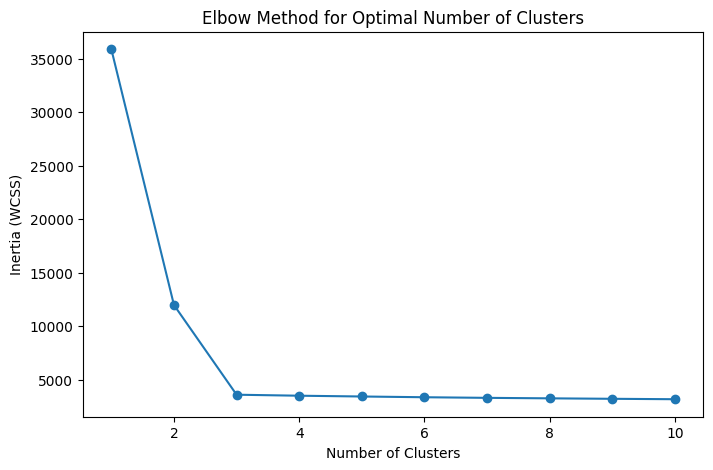

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

**Reasoning**:
The elbow method plot has been generated, showing the inertia for different numbers of clusters. The next step is to calculate the silhouette scores for different numbers of clusters to further evaluate the optimal number of clusters.



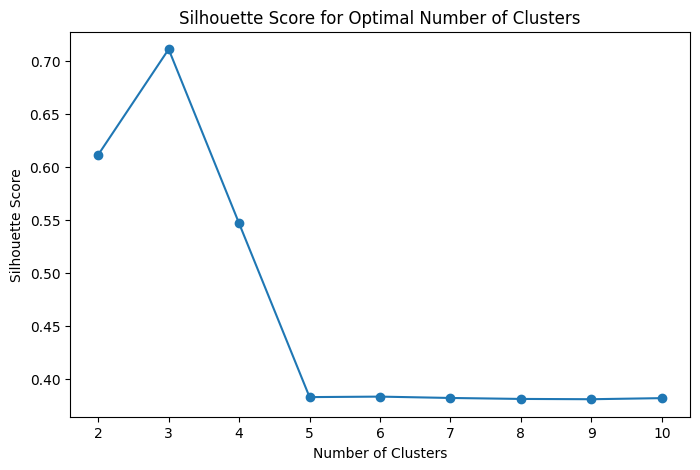

In [63]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    score = silhouette_score(df_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Number of Clusters")
plt.show()

## Determine the optimal number of clusters using silhouette score

### Subtask:
Apply KMeans clustering for a range of cluster numbers and calculate the silhouette score for each. Plot the results to find the highest score.


**Reasoning**:
Calculate the silhouette score for each number of clusters from 2 to 10, store the scores, and plot them to visualize the optimal number of clusters based on the highest silhouette score.



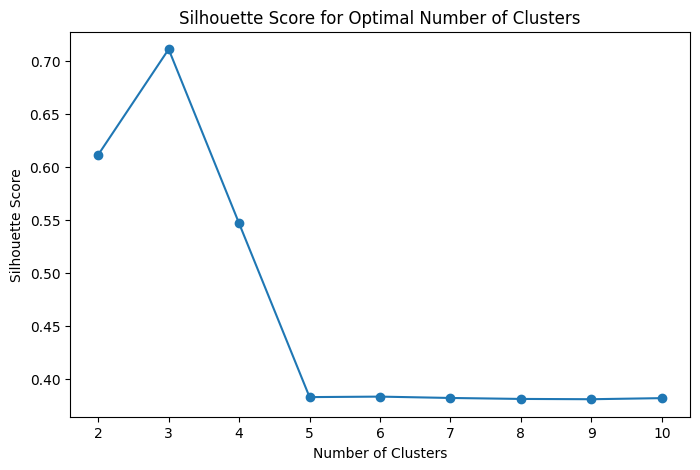

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    score = silhouette_score(df_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Number of Clusters")
plt.show()

## Perform k-means clustering

### Subtask:
Apply KMeans clustering with the optimal number of clusters determined in the previous steps.


**Reasoning**:
Apply KMeans clustering with the optimal number of clusters (3) and add the cluster labels to the original dataframe.



In [65]:
from sklearn.cluster import KMeans

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_clustering)
df['Cluster'] = kmeans.labels_
display(df.head())

,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,2.3. Use of positive reinforcement,2.4. Time on task management,2.5. Promoting learning self- discipline,...,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration,Cluster
0,5,5,4,4,5,5,4,5,5,5,...,5,4,4,5,4,5,5,4,5,0
1,2,1,1,2,2,2,2,2,1,2,...,1,2,1,1,1,1,2,1,1,2
2,5,5,4,5,5,5,4,5,5,5,...,5,4,4,5,5,5,4,5,5,0
3,2,2,1,1,1,2,2,2,1,1,...,2,1,1,1,1,2,2,1,2,2
4,4,4,4,4,4,5,5,5,5,5,...,5,4,4,5,4,4,4,5,5,0


## Visualize the clusters (optional)

### Subtask:
Use a dimensionality reduction technique like PCA to visualize the clusters in 2D or 3D space.


**Reasoning**:
Apply PCA to reduce the dimensionality of the clustering data to 2 components and add the cluster labels for visualization.



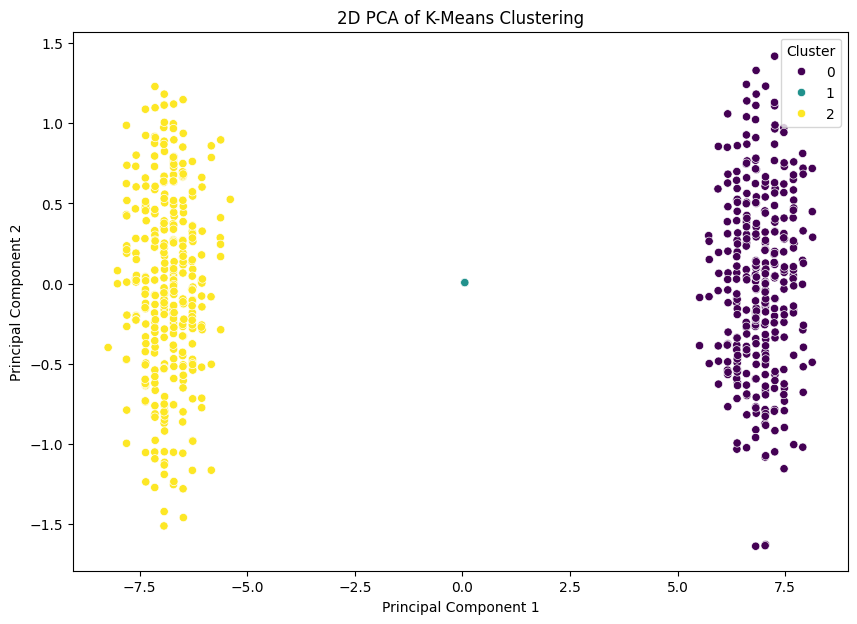

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_clustering)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
principal_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=principal_df, palette='viridis')
plt.title('2D PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Evaluate the clustering results

### Subtask:
Calculate and display the WCSS/Inertia and Silhouette Score for the final clustering result.


**Reasoning**:
Calculate and display the WCSS/Inertia and Silhouette Score for the final clustering result.



In [67]:
from sklearn.metrics import silhouette_score

wcss = kmeans.inertia_
silhouette_avg = silhouette_score(df_clustering, kmeans.labels_)

print(f"WCSS/Inertia: {wcss}")
print(f"Silhouette Score: {silhouette_avg}")

WCSS/Inertia: 3589.8471533070756
Silhouette Score: 0.7108646495998648


## Analyze and interpret clusters

### Subtask:
Calculate the mean values of the original features for each cluster to understand their characteristics.


**Reasoning**:
Group the original DataFrame by the 'Cluster' column and calculate the mean of each feature for each cluster, then display the resulting DataFrame.



In [68]:
cluster_means = df.groupby('Cluster').mean()
display(cluster_means)

,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,2.3. Use of positive reinforcement,2.4. Time on task management,2.5. Promoting learning self- discipline,...,12.1. Time and Stress Management,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.516224,4.498525,4.498525,4.460177,4.501475,4.504425,4.498525,4.522124,4.489676,4.480826,...,4.504425,4.542773,4.519174,4.519174,4.548673,4.501475,4.536873,4.519174,4.501475,4.522124
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
2,1.511561,1.508671,1.471098,1.520231,1.491329,1.500000,1.508671,1.508671,1.500000,1.549133,...,1.482659,1.517341,1.479769,1.462428,1.543353,1.468208,1.531792,1.514451,1.465318,1.485549


## Summary:

### Data Analysis Key Findings

*   The data was successfully loaded from the specified Excel file, and relevant columns (those starting with '1.') were selected for clustering.
*   No missing values were found in the selected columns, so no imputation or handling was necessary.
*   Based on the elbow method plot, an "elbow" appears to be around 3 clusters, suggesting 3 as a potential optimal number.
*   The silhouette score plot indicates that a higher silhouette score is achieved with 3 clusters compared to other tested numbers of clusters (2 to 10).
*   K-Means clustering was performed with 3 clusters.
*   The final clustering result has a WCSS/Inertia of 3589.85 and a Silhouette Score of 0.71, suggesting reasonably well-defined and separated clusters.
*   Analysis of cluster means shows distinct average feature values across the three clusters, indicating different characteristics for each group.

### Insights or Next Steps

*   The analysis strongly suggests that 3 is the optimal number of clusters for this dataset based on both the elbow method and silhouette score.
*   Further investigation into the meaning of the features and the characteristics of each cluster (as revealed by the cluster means) could provide valuable business insights or guide further actions.


## Download Clustering Results

### Subtask:
Save the DataFrame with cluster labels to a CSV file for download.

**Reasoning**:
Save the DataFrame `df` (which now includes the 'Cluster' column) to a CSV file named 'clustering_results.csv'.

In [69]:
df.to_csv('clustering_results.csv', index=False)
print("Clustering results saved to clustering_results.csv")

Clustering results saved to clustering_results.csv
